In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [3]:
import multimodalModel

In [4]:
path = '..\\data\\clean\\des_b64_wit_kag_0_of_48.tsv'

In [5]:
embedding_model = SentenceTransformer("clip-ViT-B-32")

In [6]:
model = multimodalModel.MultimodalModel(path, embedding_model)

In [7]:
model.compute_embeddings()

  0%|          | 0/18 [00:01<?, ?it/s]


RuntimeError: The size of tensor a (185) must match the size of tensor b (77) at non-singleton dimension 1

In [ ]:
model.fit()

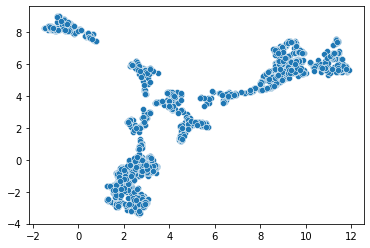

In [ ]:
model.plot_embedding()

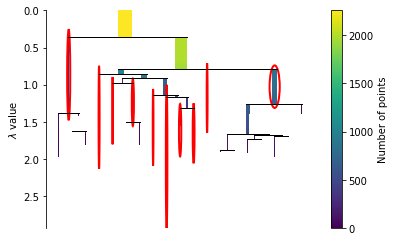

In [ ]:
model.plot_clusters()

In [ ]:
model.compute_c_tf_idf()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 16220/16220 [00:00<00:00, 205317.09it/s]


c:\Users\Martin\AppData\Local\Programs\Python\Python38\lib\site-packages\ipyplot\_utils.py:95: FutureWarning:

The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.




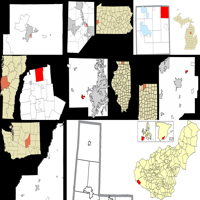
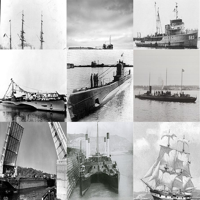
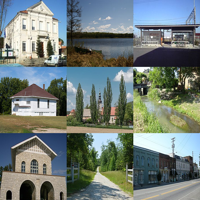
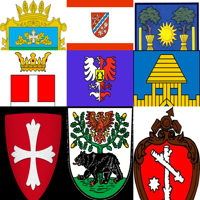
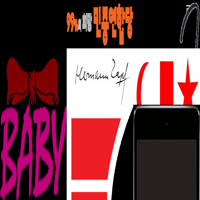
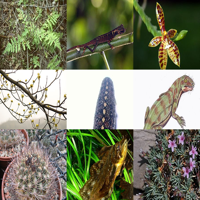
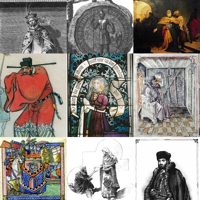
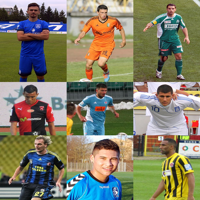
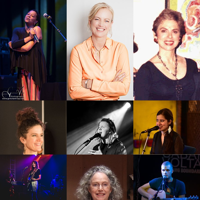
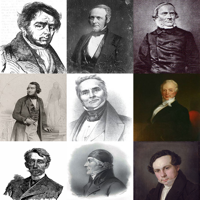


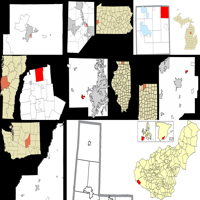
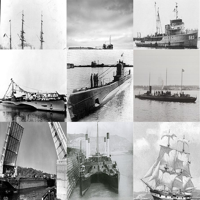
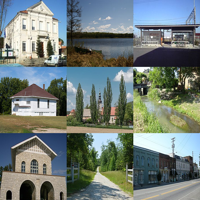
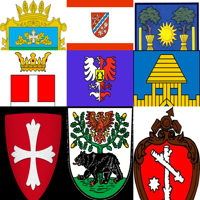
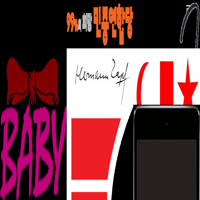
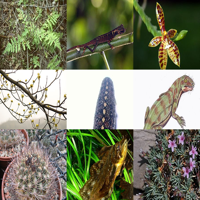
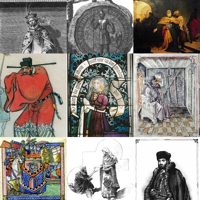
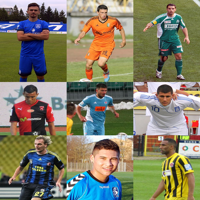
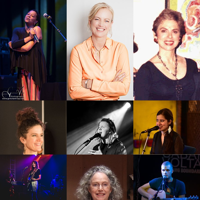
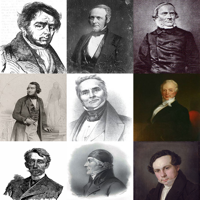

In [ ]:
model.find_image_represenatives()
model.plot_images()


In [ ]:
model.classes[0]

{'vocab': {'sundanese',
  'smaller',
  'feature',
  'retained',
  'opened',
  'consisting',
  'domain',
  'partial',
  'underway',
  'topanga',
  'diseases',
  'correspond',
  'hartford',
  'braganamiranda',
  'saintlouisdegonzague',
  'include',
  'florida',
  'p',
  'twelve',
  'massive',
  'khoisan',
  'tong',
  'krajina',
  'brisbane',
  'castries',
  'qamishli',
  'pristina',
  'haralson',
  'megabat',
  'hilly',
  'donauwrth',
  'neurodegenerative',
  'number',
  'hewanorra',
  'depth',
  'bishop',
  'mutations',
  'republican',
  'today',
  'state',
  'house',
  'robertcliche',
  'walk',
  'release',
  'eureetloir',
  'custer',
  'levels',
  'consists',
  'morning',
  'identified',
  'agency',
  'k',
  'failure',
  'strathclyde',
  'following',
  'mayagez',
  'visitors',
  'vertebrates',
  'teleorman',
  'evergreen',
  'gained',
  'officially',
  'kennedy',
  'aneuk',
  'oblast',
  'tainan',
  'overseas',
  'relocated',
  'teenagers',
  'silesian',
  'distinguished',
  'resulted